In [11]:
import numpy as np
from particleloader import load
import matplotlib.pyplot as plt

In [12]:
def jet_mass(p):
    
    P = np.zeros((p.shape[0], 4))

    P[:,0] = np.sum(p[:,:,0] * np.cosh(p[:,:,1]),axis=1)
    P[:,1] = np.sum(p[:,:,0] * np.cos(p[:,:,2]),axis=1)
    P[:,2] = np.sum(p[:,:,0] * np.sin(p[:,:,2]),axis=1)
    P[:,3] = np.sum(p[:,:,0] * np.sinh(p[:,:,1]),axis=1)

    return np.nan_to_num(np.sqrt(P[:,0]**2 - np.sum(P[:,1:]**2, axis = 1)))


def jet_pt(p):

    P = np.zeros((p.shape[0], 2))

    P[:,0] = np.sum(p[:,:,0] * np.cos(p[:,:,2]),axis=1)
    P[:,1] = np.sum(p[:,:,0] * np.sin(p[:,:,2]),axis=1)

    return np.nan_to_num(np.sqrt(np.sum(P[:,:]**2 , axis = 1)))


# Q/G Jets, Pythia and Herwig

In [13]:
# Change this to a working directory on your machine!
dir = "~/.ParticleLoader"
N = 100000

X_pythia, y_pythia = load("qg_jets", N, cache_dir=dir)
X_herwig, y_herwig = load("qg_jets", N, cache_dir=dir, generator="herwig")

classes = ["gluon", "quark"]
colors = ["red", "blue"]

/tmp/ipykernel_5734/3451573635.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(np.sqrt(P[:,0]**2 - np.sum(P[:,1:]**2, axis = 1)))


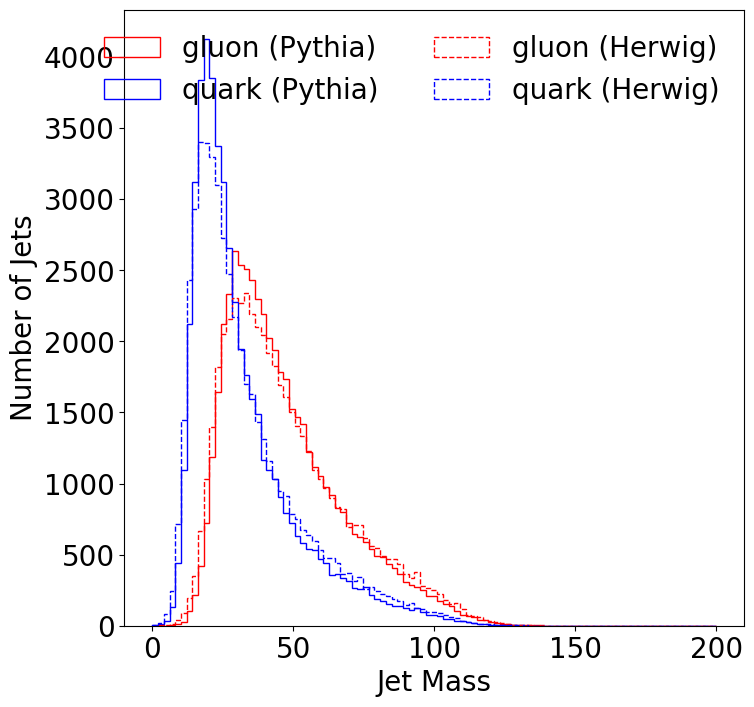

In [14]:
fig, axes = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = '20'

class_0_pythia = jet_mass(X_pythia[y_pythia == 0])
class_1_pythia = jet_mass(X_pythia[y_pythia == 1])

class_0_herwig = jet_mass(X_herwig[y_herwig == 0])
class_1_herwig = jet_mass(X_herwig[y_herwig == 1])

bins = np.linspace(0, 200, 100)
plt.hist(class_0_pythia, bins=bins, histtype='step', color=colors[0], label=classes[0] + " (Pythia)")
plt.hist(class_1_pythia, bins=bins, histtype='step', color=colors[1], label=classes[1] + " (Pythia)")
plt.hist(class_0_herwig, bins=bins, histtype='step', color=colors[0], linestyle='dashed', label=classes[0] + " (Herwig)")
plt.hist(class_1_herwig, bins=bins, histtype='step', color=colors[1], linestyle='dashed', label=classes[1] + " (Herwig)")

plt.xlabel("Jet Mass")
plt.ylabel("Number of Jets")
plt.legend(ncol = 2, frameon = False)

plt.show()


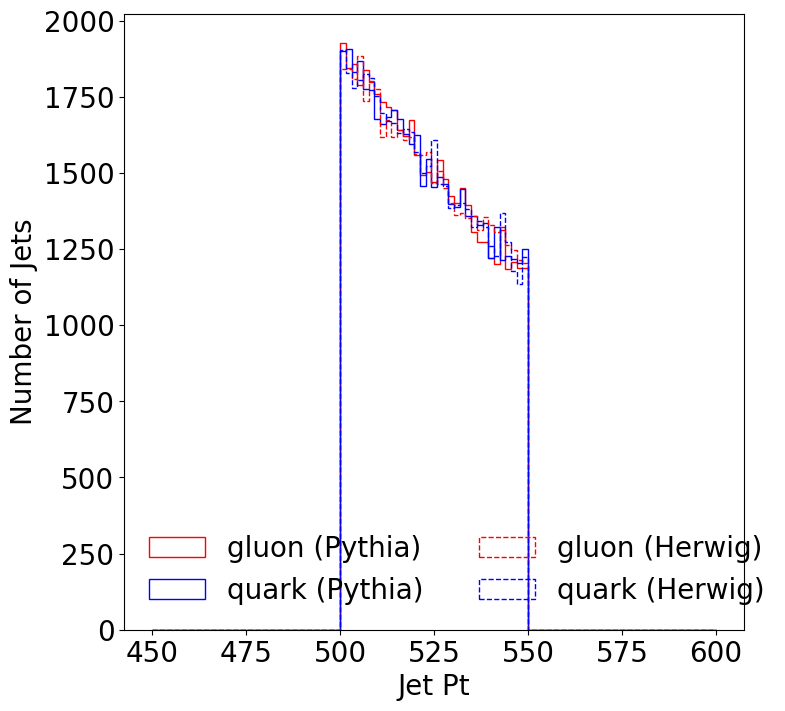

In [15]:
fig, axes = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = '20'

class_0_pythia = jet_pt(X_pythia[y_pythia == 0])
class_1_pythia = jet_pt(X_pythia[y_pythia == 1])

class_0_herwig = jet_pt(X_herwig[y_herwig == 0])
class_1_herwig = jet_pt(X_herwig[y_herwig == 1])

bins = np.linspace(450, 600, 100)
plt.hist(class_0_pythia, bins=bins, histtype='step', color=colors[0], label=classes[0] + " (Pythia)")
plt.hist(class_1_pythia, bins=bins, histtype='step', color=colors[1], label=classes[1] + " (Pythia)")
plt.hist(class_0_herwig, bins=bins, histtype='step', color=colors[0], linestyle='dashed', label=classes[0] + " (Herwig)")
plt.hist(class_1_herwig, bins=bins, histtype='step', color=colors[1], linestyle='dashed', label=classes[1] + " (Herwig)")

plt.xlabel("Jet Pt")
plt.ylabel("Number of Jets")
plt.legend(ncol = 2, frameon = False)

plt.show()


# TOP/QCD Jets, Pythia and Herwig

In [16]:
# Change this to a working directory on your machine!
dir = "~/.ParticleLoader"
N = 100000

X_pythia, y_pythia = load("topqcd_jets", N, cache_dir=dir)
X_herwig, y_herwig = load("topqcd_jets", N, cache_dir=dir, generator="herwig")

classes = ["qcd", "top"]
colors = ["red", "blue"]

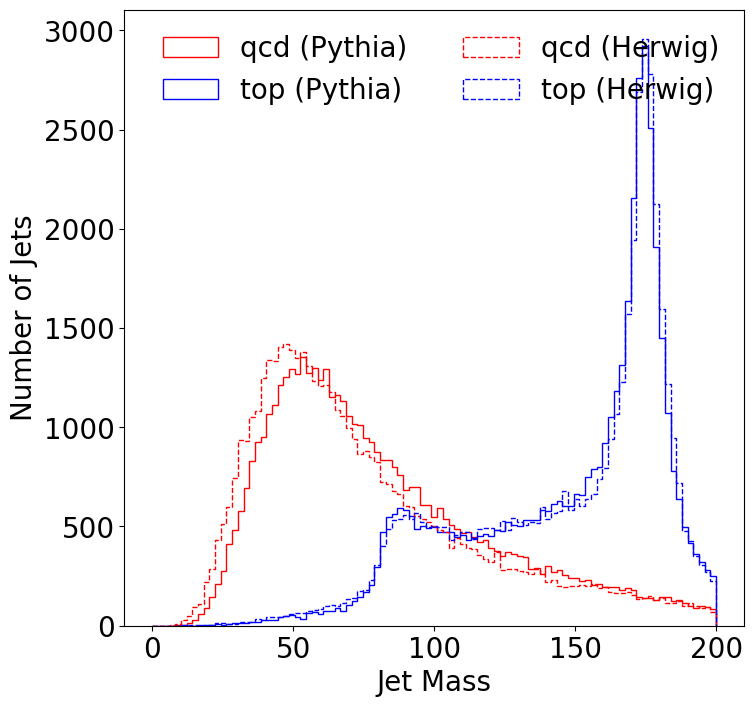

In [17]:
fig, axes = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = '20'

class_0_pythia = jet_mass(X_pythia[y_pythia == 0])
class_1_pythia = jet_mass(X_pythia[y_pythia == 1])

class_0_herwig = jet_mass(X_herwig[y_herwig == 0])
class_1_herwig = jet_mass(X_herwig[y_herwig == 1])

bins = np.linspace(0, 200, 100)
plt.hist(class_0_pythia, bins=bins, histtype='step', color=colors[0], label=classes[0] + " (Pythia)")
plt.hist(class_1_pythia, bins=bins, histtype='step', color=colors[1], label=classes[1] + " (Pythia)")
plt.hist(class_0_herwig, bins=bins, histtype='step', color=colors[0], linestyle='dashed', label=classes[0] + " (Herwig)")
plt.hist(class_1_herwig, bins=bins, histtype='step', color=colors[1], linestyle='dashed', label=classes[1] + " (Herwig)")

plt.xlabel("Jet Mass")
plt.ylabel("Number of Jets")
plt.legend(ncol = 2, frameon = False)

plt.show()


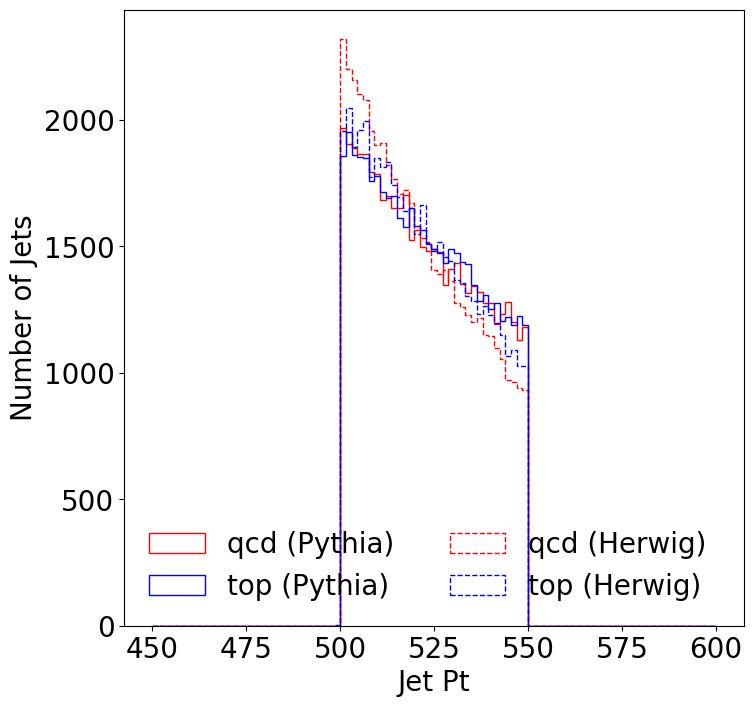

In [18]:
fig, axes = plt.subplots(figsize=(8,8))
plt.rcParams['font.size'] = '20'

class_0_pythia = jet_pt(X_pythia[y_pythia == 0])
class_1_pythia = jet_pt(X_pythia[y_pythia == 1])

class_0_herwig = jet_pt(X_herwig[y_herwig == 0])
class_1_herwig = jet_pt(X_herwig[y_herwig == 1])

bins = np.linspace(450, 600, 100)
plt.hist(class_0_pythia, bins=bins, histtype='step', color=colors[0], label=classes[0] + " (Pythia)")
plt.hist(class_1_pythia, bins=bins, histtype='step', color=colors[1], label=classes[1] + " (Pythia)")
plt.hist(class_0_herwig, bins=bins, histtype='step', color=colors[0], linestyle='dashed', label=classes[0] + " (Herwig)")
plt.hist(class_1_herwig, bins=bins, histtype='step', color=colors[1], linestyle='dashed', label=classes[1] + " (Herwig)")

plt.xlabel("Jet Pt")
plt.ylabel("Number of Jets")
plt.legend(ncol = 2, frameon = False)

plt.show()
